In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp 
import math 

In [168]:
data = pd.read_excel("dataset.xlsx")


In [257]:
data_c= data.iloc[:,[0,1,2,3,4,6,7]]
data_c
data_c

,pre_il7,pre_il8,pre_il10,pre_il15,2w_il2,2w_ip10,2w_scd40l
0,22.310,13.540,566.690,23.170,58.920,76.00,1814.000
1,20.020,11.310,423.230,2.270,21.590,218.00,871.000
2,2.000,8.010,76.110,1.020,15.820,166.00,379.000
3,75.890,22.300,284.870,50.350,16.250,753.00,311.000
4,41.830,6.820,154.310,46.110,12.870,227.00,232.000
...,...,...,...,...,...,...,...
147,3.200,28.045,15.065,10.740,8.710,325.37,392.385
148,3.200,8.400,0.010,9.605,77.790,309.15,568.840
149,478.045,19.970,4.885,24.470,74.870,1206.33,515.290
150,17.410,9.455,11.490,9.315,8.365,3266.18,250.680


----------------------------------------------------------------------------------------
# 1. Data preprocessing
---------------------------------------------------------------------------------------

## a . Center the data

In [170]:
m = data_c.mean() 
m

pre_il7       14.274455
pre_il8       20.127204
pre_il10      53.826428
pre_il15      13.383520
2w_il2        21.245520
2w_ip10      574.276706
2w_scd40l    498.474934
dtype: float64

In [171]:
std = data_c.std()
std

pre_il7       42.971138
pre_il8       29.250614
pre_il10     146.757152
pre_il15      31.583771
2w_il2        61.444545
2w_ip10      577.548576
2w_scd40l    873.533673
dtype: float64

In [172]:
m.size

7

In [173]:
x_centered = data_c


In [174]:
for i in range(m.size):
    x_centered.iloc[:,i]= (x_centered.iloc[:,i] - m[i])/std[i]

/tmp/ipykernel_14259/2970337213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_centered.iloc[:,i]= (x_centered.iloc[:,i] - m[i])/std[i]
/tmp/ipykernel_14259/2970337213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_centered.iloc[:,i]= (x_centered.iloc[:,i] - m[i])/std[i]
/tmp/ipykernel_14259/2970337213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [175]:
x_centered

,pre_il7,pre_il8,pre_il10,pre_il15,2w_il2,2w_ip10,2w_scd40l
0,0.186999,-0.225199,3.494641,0.309858,0.613146,-0.862744,1.505981
1,0.133707,-0.301437,2.517108,-0.351874,0.005606,-0.616877,0.426458
2,-0.285644,-0.414255,0.151840,-0.391452,-0.088299,-0.706913,-0.136772
3,1.433882,0.074282,1.574326,1.170426,-0.081301,0.309452,-0.214617
4,0.641257,-0.454938,0.684693,1.036180,-0.136310,-0.601294,-0.305054
...,...,...,...,...,...,...,...
147,-0.257718,0.270688,-0.264120,-0.083699,-0.204014,-0.430971,-0.121449
148,-0.257718,-0.400922,-0.366704,-0.119635,0.920252,-0.459055,0.080552
149,10.792606,-0.005374,-0.333486,0.351018,0.872730,1.094373,0.019249
150,0.072969,-0.364854,-0.288479,-0.128817,-0.209628,4.660912,-0.283670


--------------------------------------------------------------------------------------
# 2. Matrix covariance_variance
--------------------------------------------------------------------------------------

In [176]:
n = x_centered.shape[0]
n

152

In [177]:
xc[137,6] = 0

In [178]:
co_matrix = (1/n)*np.matmul(xc.transpose(),xc)
co_matrix.shape,co_matrix

((7, 7),
 array([[ 1.83437058e+03,  1.86659804e+02,  1.64500763e+03,
          4.11809201e+02,  4.82209042e+02,  3.52526730e+03,
          6.82877224e+03],
        [ 1.86659804e+02,  8.49969462e+02,  9.51824380e+02,
          1.81582560e+02,  5.95048312e+02,  3.25544246e+03,
          6.54861200e+03],
        [ 1.64500763e+03,  9.51824380e+02,  2.13959665e+04,
          2.62123992e+03,  2.41690157e+03, -4.69185133e+03,
          5.45701078e+04],
        [ 4.11809201e+02,  1.81582560e+02,  2.62123992e+03,
          9.90971868e+02,  6.70524201e+02,  1.93557514e+03,
          1.36180198e+04],
        [ 4.82209042e+02,  5.95048312e+02,  2.41690157e+03,
          6.70524201e+02,  3.75059372e+03,  7.19957958e+03,
          3.19202643e+04],
        [ 3.52526730e+03,  3.25544246e+03, -4.69185133e+03,
          1.93557514e+03,  7.19957958e+03,  3.31367868e+05,
          7.24728936e+04],
        [ 6.82877224e+03,  6.54861200e+03,  5.45701078e+04,
          1.36180198e+04,  3.19202643e+04,  7.247

-------------------------------------------------------------------------------------------------------------
# 3. Eigenvalues
-------------------------------------------------------------------------------------------------------------

In [179]:
ls,vs = np.linalg.eig(co_matrix)
ls.shape , ls

((7,),
 array([7.70684771e+05, 3.19910608e+05, 1.73029820e+04, 2.41393059e+03,
        1.63884618e+03, 5.53423624e+02, 7.05980391e+02]))

In [180]:
ls=np.sort(ls)
ls

array([5.53423624e+02, 7.05980391e+02, 1.63884618e+03, 2.41393059e+03,
       1.73029820e+04, 3.19910608e+05, 7.70684771e+05])

----------------------------------------------------------------------------------------------------------
# 4. Quality of representation :
---------------------------------------------------------------------------------------------------------

In [186]:
q = [ls[0]]
quality = 0
for e in range(len(ls)-1):
    quality = np.sum(q)/np.sum(ls)
    print(quality)
    if quality < 0.8:
        q.append(ls[e+1])
    else:
        break
len(q)

0.0004971419181711898
0.0011313259869175478
0.002603505884164748
0.004771946177717155
0.02031526103257941
0.30769181409537466


7

----------------------------------------------------------------------------------------------------------
# 5. Eigenvectors  :
---------------------------------------------------------------------------------------------------------

In [182]:
vs

array([[ 0.00966539, -0.00727411,  0.08032892,  0.19103837,  0.96750428,
        -0.14214546,  0.02520747],
       [ 0.0091756 , -0.0066586 ,  0.03400857,  0.16559371,  0.00195631,
         0.08188373, -0.9821328 ],
       [ 0.07080913,  0.04464549,  0.98748399, -0.04202387, -0.08772951,
        -0.08951274,  0.01982951],
       [ 0.01808605,  0.00118836,  0.09873677,  0.04467326,  0.12461041,
         0.98168811,  0.09320695],
       [ 0.04268949, -0.005981  ,  0.01390358,  0.96457912, -0.20150524,
        -0.03570239,  0.16017686],
       [ 0.1623329 , -0.98604048,  0.03097943, -0.0167723 , -0.00898288,
        -0.00359142,  0.00612919],
       [ 0.98300915,  0.15998909, -0.07977507, -0.04033824,  0.00472982,
        -0.00883701, -0.00219191]])

--------------------------------------------------------------------------------------------
# 6.Calculate principle components 
--------------------------------------------------------------------------------------------


In [183]:
xc.shape

(152, 7)

In [184]:
len(vs)

7

In [185]:
c = []
for i in range(len(vs)):
    c.append(np.matmul(xc,vs[i]))

len(c)
    

7

---------------------------------------------------------------------------------------------------------
# 7.Correlation coffeicients :
--------------------------------------------------------------------------------------------------------

In [209]:
c6,q6 = np.array(c[5]),q[5]
c7,q7 = np.array(c[6]),q[6]
c6.shape
xc

array([[ 8.03554503e+00, -6.58720395e+00,  5.12863572e+02, ...,
         3.76744798e+01, -4.98276706e+02,  1.31552507e+03],
       [ 5.74554503e+00, -8.81720395e+00,  3.69403572e+02, ...,
         3.44479803e-01, -3.56276706e+02,  3.72525066e+02],
       [-1.22744550e+01, -1.21172039e+01,  2.22835717e+01, ...,
        -5.42552020e+00, -4.08276706e+02, -1.19474934e+02],
       ...,
       [ 4.63770545e+02, -1.57203947e-01, -4.89414283e+01, ...,
         5.36244798e+01,  6.32053294e+02,  1.68150662e+01],
       [ 3.13554503e+00, -1.06722039e+01, -4.23364283e+01, ...,
        -1.28805202e+01,  2.69190329e+03, -2.47794934e+02],
       [-1.10744550e+01,  4.36377961e+01, -4.35364283e+01, ...,
        -1.28255202e+01, -3.59316706e+02, -1.46349338e+01]])

In [234]:
x=xc.transpose()
#np.matmul(x[0,:],c6)
x

array([[ 8.03554503e+00,  5.74554503e+00, -1.22744550e+01, ...,
         4.63770545e+02,  3.13554503e+00, -1.10744550e+01],
       [-6.58720395e+00, -8.81720395e+00, -1.21172039e+01, ...,
        -1.57203947e-01, -1.06722039e+01,  4.36377961e+01],
       [ 5.12863572e+02,  3.69403572e+02,  2.22835717e+01, ...,
        -4.89414283e+01, -4.23364283e+01, -4.35364283e+01],
       ...,
       [ 3.76744798e+01,  3.44479803e-01, -5.42552020e+00, ...,
         5.36244798e+01, -1.28805202e+01, -1.28255202e+01],
       [-4.98276706e+02, -3.56276706e+02, -4.08276706e+02, ...,
         6.32053294e+02,  2.69190329e+03, -3.59316706e+02],
       [ 1.31552507e+03,  3.72525066e+02, -1.19474934e+02, ...,
         1.68150662e+01, -2.47794934e+02, -1.46349338e+01]])

In [232]:
len(c6)

152

In [235]:
corr_c6 = []

for i in range(7):
    corr_c6.append(((1/n)*np.matmul(x[i,:],c6))/(math.sqrt(abs(xc[i,i]/n))*math.sqrt(q6)))
corr_c6

[1.4044274626517053,
 -5.5662252591113885,
 1.2789905957805767,
 0.08202330777794742,
 -2.3253658556970596,
 -43.66448902663786,
 0.22947151529185003]

In [236]:
corr_c7 = []

for i in range(7):
    corr_c7.append(((1/n)*np.matmul(x[i,:],c7))/(math.sqrt(abs(xc[i,i]/n))*math.sqrt(q7)))
corr_c7

[8.131786726470267,
 0.9265605076406004,
 -0.32719769997966797,
 0.32567860379497404,
 1.1331445065390477,
 9.537364921183208,
 0.5834623808771331]

---------------------------------------------------------------------------------------------------------
# 8.plot coffeicients :
--------------------------------------------------------------------------------------------------------

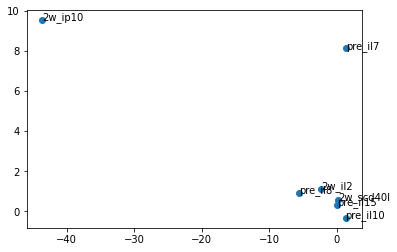

In [255]:
fig, ax = mp.subplots()
ax.scatter(corr_c6, corr_c7)
n = list(data_c.columns)
for i in range(len(n)):
    ax.annotate(n[i], (corr_c6[i], corr_c7[i]))

mp.show()


In [256]:
n

['pre_il7',
 'pre_il8',
 'pre_il10',
 'pre_il15',
 '2w_il2',
 '2w_ip10',
 '2w_scd40l']